# Latar Belakang
Sebuah Supermarket, Ingin merekrut seorang ***Data Scientist***. Supermarket ini sudah memiliki banyak customer tetapi hanya sebagian customernya saja yang sering berbelanja kembali.

## Pernyataan Masalah
Supermarket ingin mengetahui **Faktor yang mempengaruhi customer tidak sering berbelanja di supermarket**.
Informasi ini akan membantu supermarket untuk meningkatkan penjualan dengan seringnya repeat purchase dari customer.

Sebagai seorang *data scientist*, kita akan mencoba menjawab pertanyaan berikut:

**Apa yang menjadi faktor customer tidak melakukan repeat purchase di supermarket?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data Supermarket Customers yang sudah dikumpulkan oleh supermarket. Dataset dapat diakses [di sini](https://drive.google.com/file/d/1lGG2nBWS5lVEpmmBZp2r0Koesa4t6c7W/view?usp=drive_link).

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset ini berisi informasi terkait Customer, Product, Promotion, dan Purchase Place. Ada 29 kolom di dalam dataset Supermarket Customers, yaitu:

**Customer**
* ID : ID unik untuk setiap customer
* Year_Birth : (Tahun) Birthday Customer
* Education : Customer Education Level
* Marital_Status : Customer Marital_Status
* Income : Income tahunan customer
* Kidhome : Total anak kecil yang dimiliki customer
* Teenhome : Total remaja yang dimiliki customer
* Dt_Customer : Tanggal pendaftaran customer
* Recency : Jumlah hari sejak pembelian terakir customer
* Complain : 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya

**Product**
* MntWines : Jumlah pembelian anggur dalam 2 tahun terakir
* MntFruits : Jumlah pembelian buah dalam 2 tahun terakir
* MntMeatProducts : Jumlah pembelian daging dalam 2 tahun terakir
* MntFishProducts : Jumlah pembelian ikan dalam 2 tahun terakir
* MntSweetProducts : Jumlah pembelian permen dalam 2 tahun terakir
* MntGoldProds : Jumlah pembelian emas dalam 2 tahun terakir

**Promotion**
* NumDealsPurchases : Jumlah pembelian yang dilakukan dengan diskon
* AcceptedCmp1 : 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
* AcceptedCmp2 : 2 jika pelanggan menerima penawaran di kampanye kedua, 0 jika tidak
* AcceptedCmp3 : 3 jika pelanggan menerima penawaran di kampanye ketiga, 0 jika tidak
* AcceptedCmp4 : 4 jika pelanggan menerima penawaran di kampanye keempat, 0 jika tidak
* AcceptedCmp5 : 5 jika pelanggan menerima penawaran di kampanye kelima, 0 jika tidak
* Response : 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak

**Purchase_Place**
* NumWebPurchases : Jumlah pembelian yang dilakukan melalui website supermarket
* NumCatalogPurchases : Jumlah pembelian yang dilakukan melalui catalog
* NumStorePurchases : Jumlah pembelian yang dilakukan melalui datang langsung ke supermarket
* NumWebVisitsMonth :Jumlah kunjungan ke situs web supermarket dalam sebulan terakhir

Terdapat kolom Z_CostContact dan Z_Revenue yang berisi 1 value dan nantinya akan kita hapus

Berikut 5 baris teratas dan terbawah dari dataset hr_analitycs.

In [26]:
# IMPORT DATA SUPERMARKET CUSTOMERS
df = pd.read_csv('Supermarket Customers.csv', sep='\t' ,lineterminator = '\r')

# MENGHAPUS ROW TERAKHIR (NaN)
df.drop(df.tail(1).index, inplace = True)
print("Tedapat 2240 row Data")
display(df.head(),df.tail())

Tedapat 2240 row Data


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,\n5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,\n2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,\n4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,\n6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,\n5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,\n10870,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2236,\n4001,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0
2237,\n7270,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2238,\n8235,1956.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2239,\n9405,1954.0,PhD,Married,52869.0,1.0,1.0,15-10-2012,40.0,84.0,3.0,61.0,2.0,1.0,21.0,3.0,3.0,1.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0


## Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Supermarket Customers.

In [27]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   float64
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   float64
 11  MntMeatProducts      2240 non-null   float64
 12  MntFishProducts      2240 non-null   float64
 13  MntSweetProducts     2240 non-null   float64
 14  MntGoldProds         2240 non-nul

In [28]:
pd.set_option('display.max_columns', None)

display(df.describe(), df.describe(include='object'))

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,ID,Education,Marital_Status,Dt_Customer
count,2240,2240,2240,2240
unique,2240,5,8,663
top,\n5524,Graduation,Married,31-08-2012
freq,1,1127,864,12


In [29]:
#Melihat Data Unik di setiap kolom

pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[\n5524, \n2174, \n4141, \n6182, \n5324, \n7446, \n965, \n6177, \n4855, \n5899, \n1994, \n387, \n2125, \n8180, \n2569, \n2114, \n9736, \n4939, \n6565, \n2278, \n9360, \n5376, \n1993, \n4047, \n1409, \n7892, \n2404, \n5255, \n9422, \n1966, \n6864, \n3033, \n5710, \n7373, \n8755, \n10738, \n4339, \n10755, \n8595, \n2968, \n8601, \n503, \n8430, \n7281, \n2139, \n1371, \n9909, \n7286, \n7244, \n6566, \n8614, \n4114, \n1331, \n2225, \n9381, \n6260, \n10383, \n7437, \n8557, \n8375, \n6853, \n3076, \n1012, \n6518, \n4137, \n8082, \n1386, \n9369, \n4477, \n1357, \n1402, \n10629, \n6312, \n8132, \n1050, \n5846, \n1859, \n7503, \n10401, \n1618, \n3332, \n2261, \n5346, \n4119, \n535, \n5268, \n273, \n4452, \n8504, \n771, \n8996, \n9235, \n5798, \n11178, \n2230, \n7516, \n7247, \n11100, \n4646, \n3037, ...]"
1,Year_Birth,59,"[1957.0, 1954.0, 1965.0, 1984.0, 1981.0, 1967.0, 1971.0, 1985.0, 1974.0, 1950.0, 1983.0, 1976.0, 1959.0, 1952.0, 1987.0, 1946.0, 1980.0, 1949.0, 1982.0, 1979.0, 1951.0, 1969.0, 1986.0, 1989.0, 1963.0, 1970.0, 1973.0, 1943.0, 1975.0, 1996.0, 1968.0, 1964.0, 1977.0, 1978.0, 1955.0, 1966.0, 1988.0, 1948.0, 1958.0, 1972.0, 1960.0, 1945.0, 1991.0, 1962.0, 1953.0, 1961.0, 1956.0, 1992.0, 1900.0, 1893.0, 1990.0, 1947.0, 1899.0, 1993.0, 1994.0, 1941.0, 1944.0, 1995.0, 1940.0]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0.0, 1.0, 2.0]"
6,Teenhome,3,"[0.0, 1.0, 2.0]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58.0, 38.0, 26.0, 94.0, 16.0, 34.0, 32.0, 19.0, 68.0, 11.0, 59.0, 82.0, 53.0, 23.0, 51.0, 20.0, 91.0, 86.0, 41.0, 42.0, 63.0, 0.0, 69.0, 89.0, 4.0, 96.0, 56.0, 31.0, 8.0, 55.0, 37.0, 76.0, 99.0, 3.0, 88.0, 80.0, 72.0, 24.0, 92.0, 39.0, 29.0, 2.0, 54.0, 57.0, 30.0, 12.0, 18.0, 75.0,

**Secara keseluruhan, kita bisa melihat bahwa :**

* Dataset Supermarket Customers memiliki 29 kolom dan 2.240 baris.

* Kolom ID memiliki error input '\n', akan kita perbaiki.

* Kolom Income memiliki data kosong sebanyak 24. Data kosong pada kolom tersebut diwakili dengan data NaN.

* Pada Kolom Income terdapat anomali inputan yang dimana nilai maksimal dari data Income adalah 666.666, kemungkinan ini adalah kesalahan input data jadi akan kita hapus

* Kolom Z_CostContact dan Z_Revenue tidak ada di penjelasan pdf dan hanya terdapat 1 value saja sehingga kita asumsikan kedua kolom tersebut tidak digunakan sehingga bisa dihapus saja

* Kolom Education penulisan 2n Cycle kita ubah menjadi Master

* Kolom Marital Status, terdapat Alone, Absurd, dan YOLO yang akan kita gabungkan menjadi Single dan status Together akan kita ubah menjadi Married. Sehingga hasil akhir dari kolom Martial hanya ada 4 opsi **yaitu** : ***Single, Married, Divorced, Widow***

* Kolom Year_Birth ada 3 inputan berisi 1893,1899,1900. Dimana artinya kemungkinan ada kesalahan input saat pendaftaran customer. Hal ini akan kita lihat lagi kedepannya akankah berpengaruh terhadap data yang kita olah (opsional)

# Missing Value

In [30]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [31]:
# PENGECEKAN DATA KOSONG, DAN DI TEMUKAN SEBANYAK 24 ROW KOSONG DI KOLOM INCOME

print(len(df[df.isna().any(axis=1)]))
df[df.isna().any(axis=1)]

24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,\n1994,1983.0,Graduation,Married,NaN,1.0,0.0,15-11-2013,11.0,5.0,5.0,6.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
27,\n5255,1986.0,Graduation,Single,NaN,1.0,0.0,20-02-2013,19.0,5.0,1.0,3.0,3.0,263.0,362.0,0.0,27.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
43,\n7281,1959.0,PhD,Single,NaN,0.0,0.0,05-11-2013,80.0,81.0,11.0,50.0,3.0,2.0,39.0,1.0,1.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
48,\n7244,1951.0,Graduation,Single,NaN,2.0,1.0,01-01-2014,96.0,48.0,5.0,48.0,6.0,10.0,7.0,3.0,2.0,1.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
58,\n8557,1982.0,Graduation,Single,NaN,1.0,0.0,17-06-2013,57.0,11.0,3.0,22.0,2.0,2.0,6.0,2.0,2.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
71,\n10629,1973.0,2n Cycle,Married,NaN,1.0,0.0,14-09-2012,25.0,25.0,3.0,43.0,17.0,4.0,17.0,3.0,3.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
90,\n8996,1957.0,PhD,Married,NaN,2.0,1.0,19-11-2012,4.0,230.0,42.0,192.0,49.0,37.0,53.0,12.0,7.0,2.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
91,\n9235,1957.0,Graduation,Single,NaN,1.0,1.0,27-05-2014,45.0,7.0,0.0,8.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
92,\n5798,1973.0,Master,Together,NaN,0.0,0.0,23-11-2013,87.0,445.0,37.0,359.0,98.0,28.0,18.0,1.0,2.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
128,\n8268,1961.0,PhD,Married,NaN,0.0,1.0,11-07-2013,23.0,352.0,0.0,27.0,10.0,0.0,15.0,3.0,6.0,1.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


Secara garis besar:  
* *missing value* hanya ada di kolom 'Income'
* Jumlah missing value di kolom Income ada 24 data (1.07%). Dikarenakan data missing value yang terbilang sedikit, maka kita akan menggunakan cara menghapus untuk menangani masalah *missing value*

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.

### Anomali kolom Income & Missing Value
Kita hapus 24 data yang missing value
Sehingga Total Data kita akan menjadi 2.216 Baris


In [32]:
# TOTAL ROW YANG AKAN DI OLAH ADALAH = 2216 ROW

df = df.dropna(subset =['Income'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,\n5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,\n2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,\n4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,\n6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,\n5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,\n10870,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2236,\n4001,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0
2237,\n7270,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2238,\n8235,1956.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


Kita akan memperbaiki kolom ID, dengan mengilangkan tulisan '\n' yang tidak diperlukan

In [33]:
# CLENING DATA, MENGHAPUS '\n' DI KOLOM ID

df['ID'] = df['ID'].str.replace('\n','')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2236,4001,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0
2237,7270,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2238,8235,1956.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


Kita juga menghapus 1 data yang kemungkinan ada kesalahan input yaitu pada hasil inputan income 666.666

Sehingga kita memiliki total data 2.215 baris

In [34]:
print("Nilai terbesar pertama kolom Income = {}".format(sorted(df['Income'])[-1]))
print("Nilai terbesar kedua kolom Income = {}".format(sorted(df['Income'])[-2]))
print("Terdapat perbedaan yang signifikan antara nilai max pertama dan max kedua kolom income, kemungkinan ini adalah kesalahan input income, akan kita hapus data ini")

df = df[df['Income']!=666666]
df

Nilai terbesar pertama kolom Income = 666666.0
Nilai terbesar kedua kolom Income = 162397.0
Terdapat perbedaan yang signifikan antara nilai max pertama dan max kedua kolom income, kemungkinan ini adalah kesalahan input income, akan kita hapus data ini


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2236,4001,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0
2237,7270,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2238,8235,1956.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


### Anomali kolom Z_CostContact, dan Z_Revenue
Dikarenakan kolom Z_CostContact dan Z_Revenue hanya ada 1 variabel, maka kita asumsikan tidak menggunakan kolom tersebut, dan akan kita hapus

Hapus kolom Z_CostContact dan Z_Revenue yang tidak kita gunakan

In [35]:
column = ['Z_CostContact','Z_Revenue']
df = df.drop(columns = column)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2236,4001,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2237,7270,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,8235,1956.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Anomali kolom Education
Isi dari kolom Education terdapat 2n Cycle, 2n Cycle akan kita asumsikan sebagai gelar Master, maka akan kita ubah menjadi Master

* Basic dapat diasumsikan hanya memiliki pendidikan dasar dan belum punya gelar
* Kolom Graduation dapat diasumsikan sebagai 1st Cycle
* Kolom Master dapat diasumsikan sebagai 2nd Cycle
* Kolom PhD dapat diasumsikan sebagai 3rd Cycle

Untuk selanjutnya kita akan menggunakan 4 Status Education = Basic, Graduation, Master, dan PhD


In [36]:
df['Education'] = df['Education'].replace('2n Cycle', 'Master')
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

### Anomali kolom Marital Status
Isi dari kolom Marital terdapat Alone, Absurd, dan YOLO yang akan kita gabungkan menjadi Single dan status Together akan kita ubah menjadi Married. Sehingga hasil akhir dari kolom Marital Status hanya ada 4 opsi yaitu : Single, Married, Divorced, Widow

In [37]:
#Perubahan Alone, Absurd, YOLO menjadi Single
merge_single = ['Alone','Absurd','YOLO']
df['Marital_Status'] = df['Marital_Status'].replace(merge_single,'Single')


#Perubahan Together menjadi Married
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')

df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

### Pengelompokan Recency
Kita akan buat kolom baru ('Recency_Group) yang isinya pengelompokan dari Recency per 10 hari
agar lebih terlihat sebaran last purchase customer.

In [38]:
conditions = [df['Recency']<10,df['Recency']<20,df['Recency']<30,df['Recency']<40,df['Recency']<50,df['Recency']<60,df['Recency']<70,df['Recency']<80,df['Recency']<90,df['Recency']<100]
result = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']

df['Recency_Group'] = np.select(conditions,result, default='Error')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_Group
0,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50-59
1,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30-39
2,4141,1965.0,Graduation,Married,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20-29
3,6182,1984.0,Graduation,Married,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20-29
4,5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-49
2236,4001,1946.0,PhD,Married,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50-59
2237,7270,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,90-99
2238,8235,1956.0,Master,Married,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-9


### Tambahan kolom Total_Promotion dan Ikut_Promo
Kita akan buat kolom baru ('Total_Promotion') yang total promotion yang diikuti oleh customer, isinya penjumlahan dari AcceptedCmp1 sampai AcceptedCmp5 dan Response.

Kita akan buat kolom baru ('Ikut_Promo') untuk mempermudah pengelompokan customer yang pernah ikut promo dan yang tidak pernah ikut promo

Tujuannya agar kita lebih mudah melihat quantity customer ikut promotion campaign dan jumlah customer yang sama sekali tidak pernah ikut promotion campaign

In [39]:
df['Total_Promotion'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] +df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['Ikut_Promo'] = np.where(df['Total_Promotion']==0,'Tidak','Ya')

## Data Clean
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [40]:
df.reset_index(drop=True, inplace=True)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2215, 30)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,object,0,2215,"[1072, 5289]"
1,Year_Birth,float64,0,59,"[1952.0, 1899.0]"
2,Education,object,0,4,"[Basic, Master]"
3,Marital_Status,object,0,4,"[Married, Widow]"
4,Income,float64,0,1973,"[79593.0, 73926.0]"
5,Kidhome,float64,0,3,"[1.0, 2.0]"
6,Teenhome,float64,0,3,"[2.0, 1.0]"
7,Dt_Customer,object,0,662,"[06-06-2014, 16-12-2013]"
8,Recency,float64,0,100,"[31.0, 15.0]"
9,MntWines,float64,0,776,"[670.0, 597.0]"


Sebelum dibersihkan, kita memiliki 2,240 baris data dan 29 kolom data, sekarang kita memiliki 2,215 baris dan 30 kolom data. Sebanyak 25 baris data yang kosong dan kesalahan input dihapus, 2 kolom data yang tidak kita digunakan dihapus, dan ada 3 penambahan kolom baru untuk mempermudah analisa.

### Download file yang sudah Clean

In [41]:
from IPython.display import FileLink

df.to_csv('Supermarket_Clean.csv', index=True)

FileLink('Supermarket_Clean.csv')

d:\01. PURWADHIKA\CAPSTONE PROJECT 2\CAPSTONE PROJECT 2\Supermarket_Clean.csv

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **penyebab hanya sebagian customer saja yang sering berbelanja di supermarket**.  

Analisis akan dilakukan dengan melihat sebaran seringnya customer berbelanja di supermarket.

C:\Users\Izal\AppData\Local\Temp\ipykernel_21188\2905820967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="data_x", y="data_y", palette='mako')


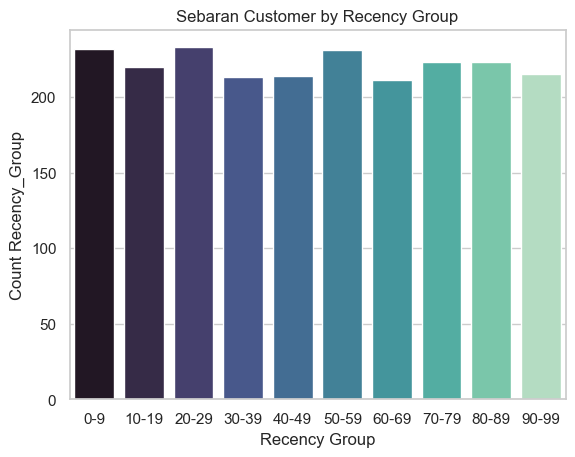

Recency_Group
0-9      232
10-19    220
20-29    233
Name: Recency_Group, dtype: int64
30 hari terakir terdapat 685 customer yang datang berbelanja lagi di supermarket, Data ini sebesar 31.0% dari Total Data Customer


In [42]:
proporsi = df.groupby('Recency_Group')['Recency_Group'].count()
data = pd.DataFrame({"data_x": proporsi.index, "data_y": proporsi.values})
sns.barplot(data=data, x="data_x", y="data_y", palette='mako')
plt.xlabel('Recency Group')
plt.ylabel(f"Count Recency_Group")
plt.title(f"Sebaran Customer by Recency Group")
plt.show()
print(proporsi[0:3])
print(f"30 hari terakir terdapat {proporsi[0:3].sum()} customer yang datang berbelanja lagi di supermarket, Data ini sebesar {(round((proporsi[0:3].sum()/proporsi.sum()),2))*100}% dari Total Data Customer")

## Berdasarkan `Ikut_Promo` dan `Total Promotion`  

Pertama, mari kita lihat bagaimana pengaruh Promo Campaign terhadap seringnya customer berbelanja lagi di supermarket. Kita akan menganalisis kolom `Ikut_Promo` dan `Total_Promotion` untuk menjawab pertanyaan *Apakah customer yang mengikuti promo campaign berpengaruh terhadap seringnya customer belanja di supermarket*

C:\Users\Izal\AppData\Local\Temp\ipykernel_21188\1530512561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="data_x", y="data_y", palette='mako')


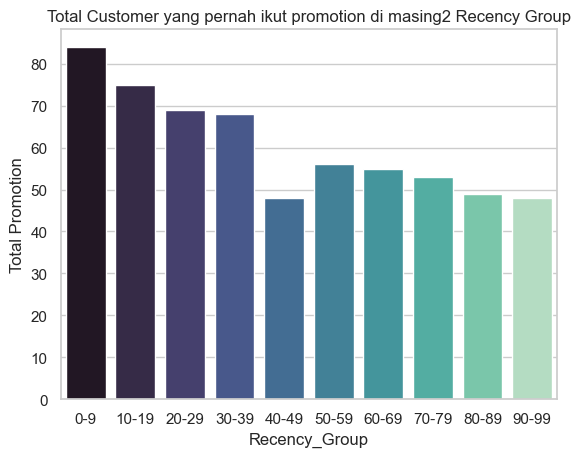

In [43]:
filter = df[df['Total_Promotion']>0]
proporsi = filter.groupby('Recency_Group')['ID'].count()
data = pd.DataFrame({"data_x": proporsi.index, "data_y": proporsi.values})
sns.barplot(data=data, x="data_x", y="data_y", palette='mako')
plt.xlabel('Recency_Group')
plt.ylabel(f"Total Promotion")
plt.title(f"Total Customer yang pernah ikut promotion di masing2 Recency Group")
plt.show()

Dari hasil grafik diatas kita bisa melihat bahwa customer yang mengikuti promo campaign, cenderung lebih sering berbelanja di Supermarket.
Customer yang berbelanja 0-9 hari terakir mengikuti promo terbanyak dibanding yang lain.

In [44]:
# CEK DISTRIBUSI KOLOM RECENCY

from scipy.stats import normaltest
stats, pval=normaltest(df['Recency'])
if pval<=0.05:
    print(f'{pval}, distribusi tidak normal') #Ha
else:
    print(f'{pval}, distribusi normal') #Ho

0.0, distribusi tidak normal


In [45]:
# Uji Statistik, apakah ada perbedaan Recency antara customer yang pernah ikut promo dan yang tidak pernah ikut promo
# karena distribusi data tidak normal maka kita akan menggunakan mann whitney

from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Ikut_Promo']==i]['Recency'] for i in df['Ikut_Promo'].unique()], alternative='less')
print(f'Pval : {pval}')
if pval <= 0.05:
    print('Terdapat perbedaan rata2 Recency dengan kelompok Ikut_Promo')
else:
    print('Tidak terdapat perbedaan rata2 Recency dengan kelompok Ikut_Promo')

Pval : 7.810497703821348e-07
Terdapat perbedaan rata2 Recency dengan kelompok Ikut_Promo


Dari hasil Uji diatas dapat disimpulkan ada perbedaan yang signifikan antara customer yang pernah ikut promo campaign dan tidak, dengan customer yang sering belanja di supermarket

Dari hasil data diatas dapat disimpulkan bahwa Customer yang sering ikut promo campaign berpengaruh terhadap Recency.

## Kolom `Education` dan `Marital_Status`  

Di kolom `Education` dan `Marital_Status` kita akan melihat sebaran data seberapa banyak customer yang pernah ikut promo campaign dan yang tidak pernah ikut.

Lihat Grafik data `Education` dan `Marital_Status` dibawah :
 - Diagram warna merah menunjukan sebaran customer yang belum pernah ikut promo campaign.
 - Diagram warna biru menunjukan total customer supermarket

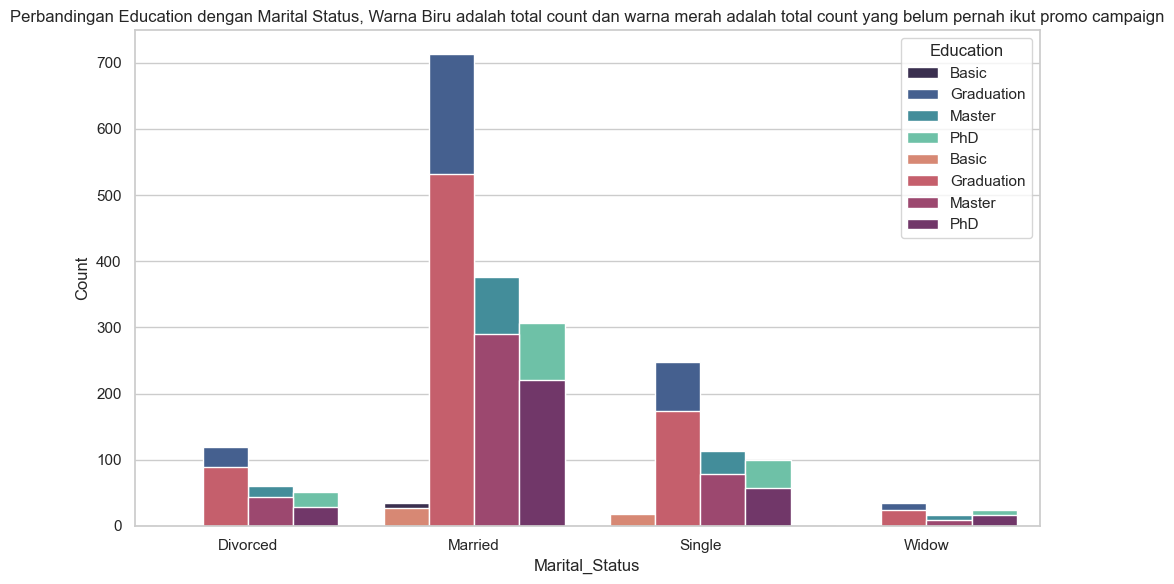

In [46]:
filter = df[df['Total_Promotion']==0]
proporsi_filter = filter.groupby(['Marital_Status', 'Education'])['ID'].count()
proporsi_filter = proporsi_filter.reset_index()

proporsi = df.groupby(['Marital_Status', 'Education'])['ID'].count()
proporsi = proporsi.reset_index()

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=proporsi, x='Marital_Status', y='ID', hue='Education', palette='mako', ax=ax)
sns.barplot(data=proporsi_filter, x='Marital_Status', y='ID', hue='Education', palette='flare', ax=ax)

plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Perbandingan Education dengan Marital Status, Warna Biru adalah total count dan warna merah adalah total count yang belum pernah ikut promo campaign')

plt.legend(title='Education', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Dari Grafik diatas menunjukan customer dengan `Marital_Status Married` memiliki kuantitas belum pernah ikut promo campaign terbanyak di banding yang lain, diseluruh kelompok Education.

Marital_Status Single ada di urutan kedua belum pernah ikut promo campaign, disusul oleh Divorced dan Widow yang memiliki kuantitas terbilang kecil.


## Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProduct` dan `MntGoldProds`  

Di kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProduct` dan `MntGoldProds` kita akan melihat sebaran data seberapa banyak proporsi yang di beli oleh masing2 `Marital_Status`

Lihat Grafik dibawah :
 - Setiap Grafik menunjukan setiap kolom Mnt Produk yang di beli (sumbu y)
 - di (sumbu x) menunjukan data `Marital_Status`
 - di setiap warna menunjukan data `Education`
 - Garis merah menunjukan rata2 proprosi dari `Marital_Status`

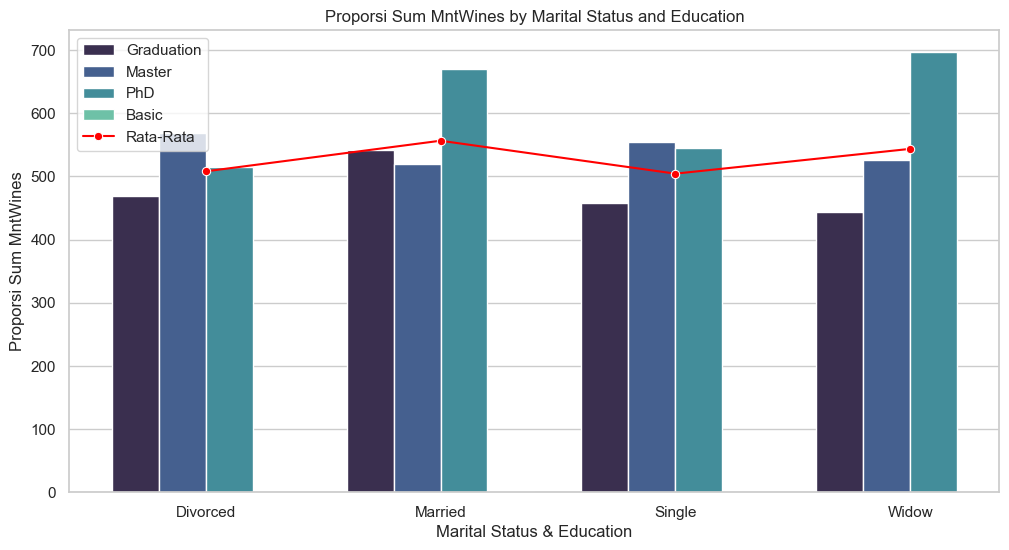

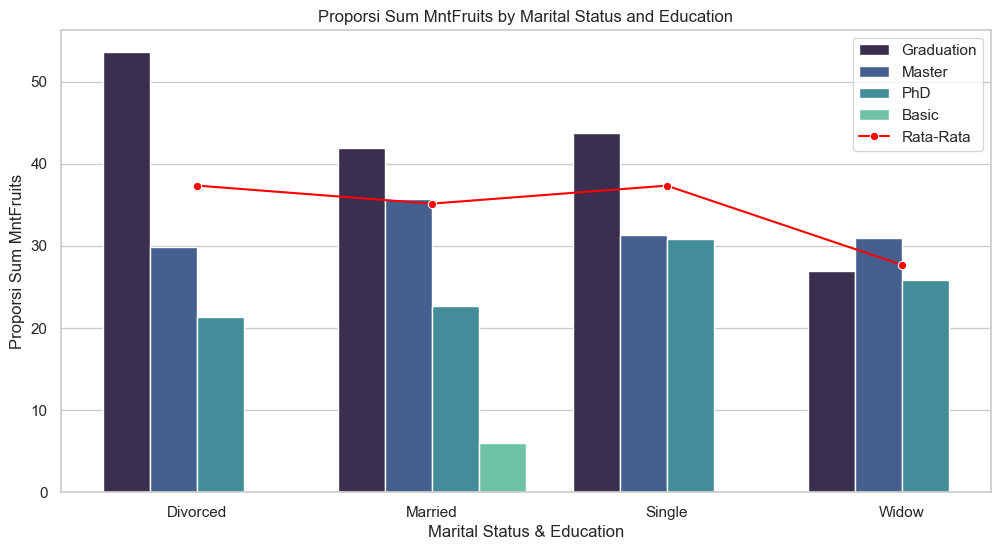

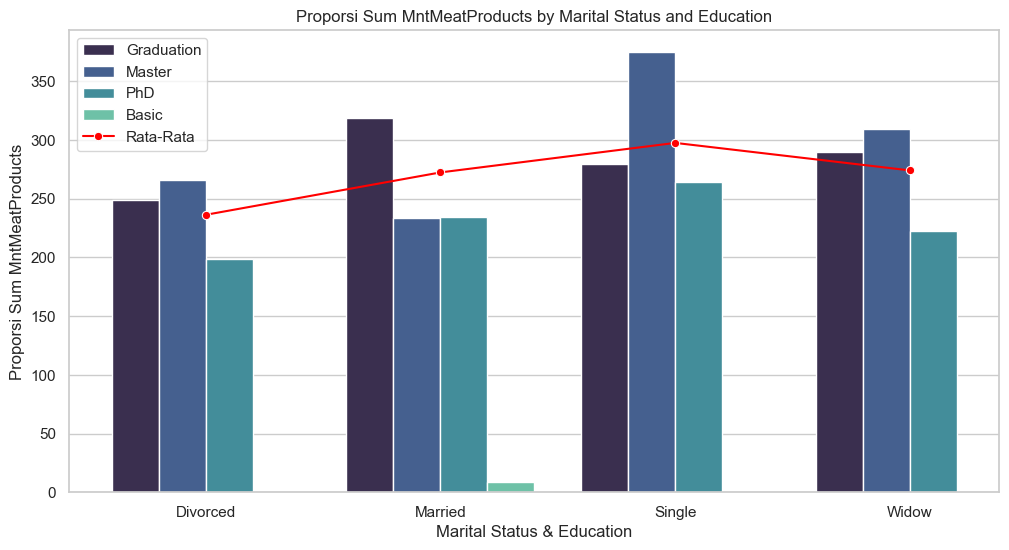

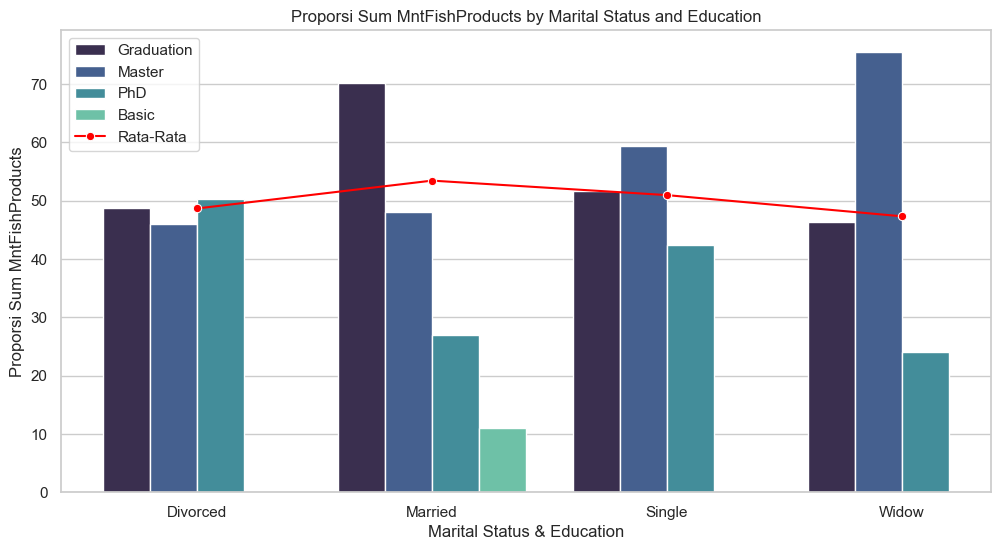

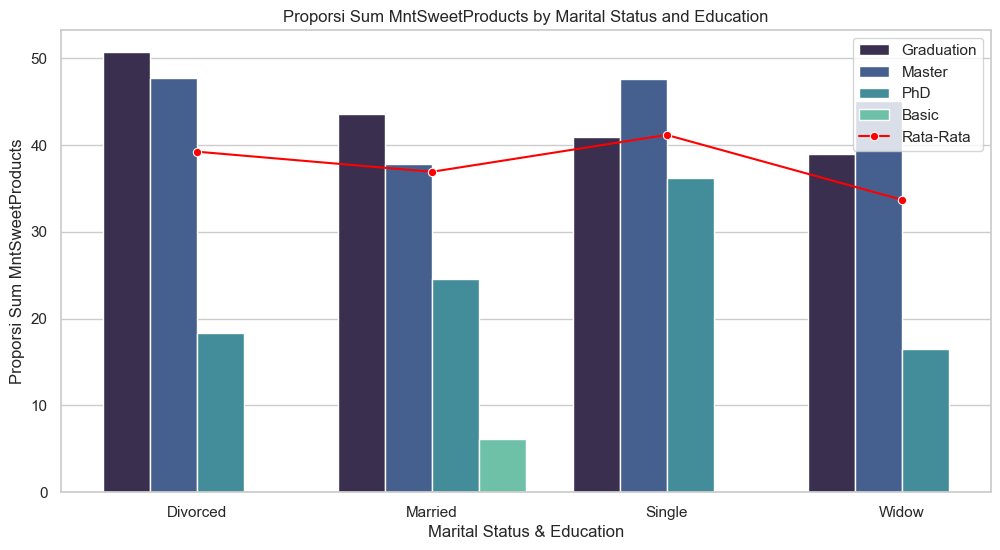

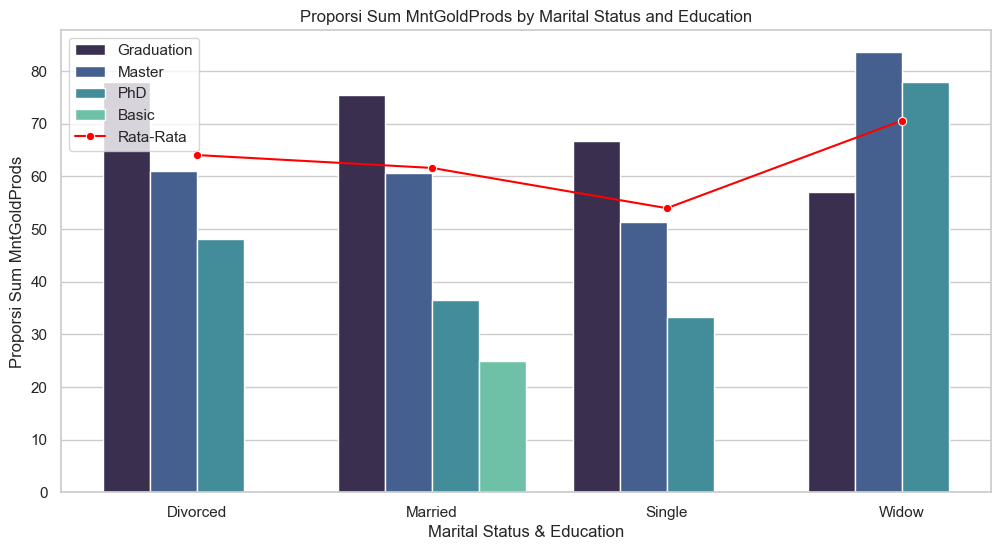

In [47]:
data = df[df['Total_Promotion']>0]

for j in ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']:
  proporsi = data.groupby(['Marital_Status', 'Education'])[j].sum()/data.groupby(['Marital_Status', 'Education'])[j].count()
  proporsi = proporsi.reset_index()

  fig= plt.subplots(figsize=(12, 6))

  sns.barplot(x=proporsi["Marital_Status"], y=proporsi[j] ,hue =proporsi['Education'], palette='mako')

  mean_line = data.groupby(['Marital_Status'])[j].mean()
  mean_line = mean_line.reset_index()
  sns.lineplot(x = mean_line['Marital_Status'], y=mean_line[j], marker='o', color='red', label='Rata-Rata')

  plt.xlabel('Marital Status & Education')
  plt.ylabel(f"Proporsi Sum {j}")
  plt.title(f"Proporsi Sum {j} by Marital Status and Education")

  plt.show()
print("\n")

**Dari Mnt Produk Grafik diatas kita akan memberikan ranking 1-2 di Marital_Status. Agar kita bisa mengetahui favorit produk yang di beli secara proporsi oleh masing-masing Marital_Status, dengan rangkuman sebagai berikut :**

 - Favorit MntWines :
    1. Married
    2. Widow
 - Favorit MntFruits :
    1. Divorced
    2. Single
 - Favorit MntMeatProduct :
    1. Single
    2. Widow
 - Favorit MntFishProduct :
    1. Married
    2. Single
 - Favorit MntSweetProduct :
    1. Single
    2. Divorced
 - Favorit MntGoldProd:
    1. Widow
    2. Divorced


# Kesimpulan dan Rekomendasi

**Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan untuk menaikan angka Recency Customer :**
* Dari 2,215 data customer yang kita miliki, hanya 685 customer saja yang kembali berbelanja di supermarket dalam 30 hari terakir. (asumsi 30 hari karena biasanya dalam sebulan setidaknya customer berbelanja di supermarket 1x (belanja bulanan))
* Ditemukan seiring banyaknya customer yang mengikuti promo campaign, maka biasanya customer tersebut semakin sering berbelanja dalam waktu dekat.
* Customer dengan Marital_Status Married memiliki populasi terbanyak disusul oleh Single, Divorced, dan yang terakir Widow
* Customer dengan Education Graduation memiliki populasi terbanyak disusul oleh Master, PhD, dan yang terakir Basic. Tetapi kolom Education tidak terlalu berpengaruh terhadap custome yang pernah ikut promo campaign atau tidak.

**Rekomendasi**
1. Semakin banyaknya customer yang ikut promo campaign, maka semakin sering juga customer tersebut berbelanja di supermarket. Sehingga untuk menaikan frekuensi customer berbelanja disupermarket kita bisa fokus dengan promo campaign terlebih dahulu.
2. Customer dengan Marital_Status Married memiliki populasi terbanyak dan juga paling banyak yang belum pernah mengikuti promo campaign. Kita bisa fokus di customer yang memiliki Marital_Status Married.
3. Customer Marital_Status Married mereka memiliki beberapa favorit produk yang secara proporsi paling banyak di beli oleh Customer dengan status Married. Produk tersebut adalah   `MntWines` dan `MntFish`.
4. Sehingga untuk menaikan frekuensi customer belanja di supermarket, kita bisa fokus kepada jumlah customer yang mengikuti promo. Kita fokus ke customer yang memiliki kuantitas dengan Marital_Status terbanyak yaitu `Married` dan favorit produk mereka adalah `MntWines` dan `MntFish`.

***Rekomendasi finalnya kita bisa menaikan jumlah frekuensi belanja customer dengan fokus terhadap promo campaign khususnya ditujukan kepada customer dengan Marital Status `Married` yang memiliki populasi terbanyak dan favorit produk mereka MntWines dan MntFish.***

Diharapkan analisis ini bisa membantu supermarket membuat promo campaign yang lebih efisien dan terarah agar frekuensi belanja customer meningkat.